### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

## Image Histograms ([Wikipedia](https://en.wikipedia.org/wiki/Image_histogram))

An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image. 

It plots the number of pixels for each tonal value. The horizontal axis of the graph represents the tonal variations, while the vertical axis represents the total number of pixels in that particular tone. The left side of the horizontal axis represents the dark areas, the middle represents mid-tone values and the right hand side represents light areas. The vertical axis represents the size of the area (total number of pixels) that is captured in each one of these zones. 

Thus, the histogram for a very dark image will have most of its data points on the left side and center of the graph. 

Conversely, the histogram for a very bright image with few dark areas and/or shadows will have most of its data points on the right side and center of the graph. 

By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance. 

In the field of computer vision, image histograms can be useful tools for thresholding. Because the information contained in the graph is a representation of pixel distribution as a function of tonal variation, image histograms can be analyzed for peaks and/or valleys. This threshold value can then be used for edge detection, image segmentation, and co-occurrence matrices. 

## Finding and Plotting Image Histograms ([Docs](https://docs.opencv.org/4.7.0/d1/db7/tutorial_py_histogram_begins.html))

> In OpenCV we use the `cv.calcHist(image, channels, mask, histSize, ranges)` function to find the histogram of an image.

<u>Function Parameters</u>

**Note:** All the parameter values should be passed inside of a square bracket i.e, "[img]".

- image: Source image of type uint8 or, float32.
- channels: It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, we can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
- mask: To find histogram of full image, it is given as "None". But to find histograms of some particular regions of an image, we create a mask image with white color on the region of interest and black otherwise. Then pass this as the mask.
- histSize: This represents our 'bin' count. For full scale, we pass [256] i.e, each bin is of size 1 (as the image intensity varies between 0-255).
- ranges: It is the range of intensity values you want to measure for the histogram. Normally, it is [0, 256], i.e, all intensity values.

> To plot a Image Histogram without explicit calculating step we can use the `matplotlib.pyplot.hist(img.ravel(), bins, range, color, histtype)` command. 

> To plot the histogram calculated with the `cv.caclHist()` function using matplotlib we use the simple `matplotlib.pyplot.plot(calculated_histograms, color)` command.

In [3]:
img_gray_cherry_blossom = cv.imread("./imgs/cherry_blossom.jpeg", 0)
img_color_cherry_blossom = cv.imread("./imgs/cherry_blossom.jpeg")

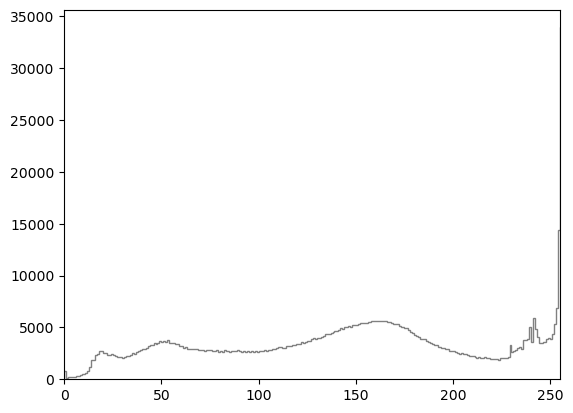

In [4]:
# plotting histogram for grayscale image without calculating the histogram with cv.calcHist() at first
plt.hist(img_gray_cherry_blossom.ravel(), 256, [0, 256], color="gray", histtype="step")
plt.xlim(0, 255)
plt.show()

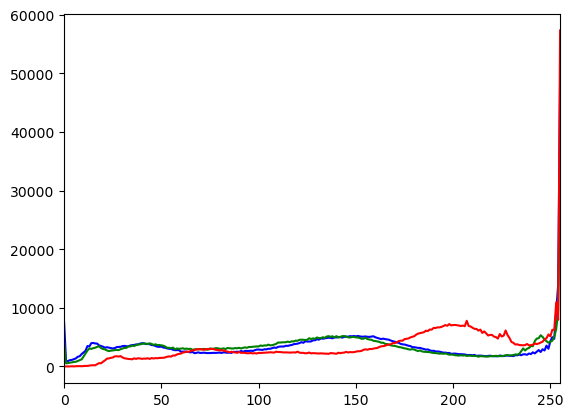

In [5]:
# finding and plotting histogram for the "BGR" image
color_channels = ["b", "g", "r"]
for i, color in enumerate(color_channels):
    hist_color = cv.calcHist(
        [img_color_cherry_blossom], [i], None, histSize=[256], ranges=[0, 256]
    )
    plt.plot(hist_color, color=color)

plt.xlim(0, 255)
plt.show()

In [6]:
img_gray_cherry_blossom.shape

(810, 1080)

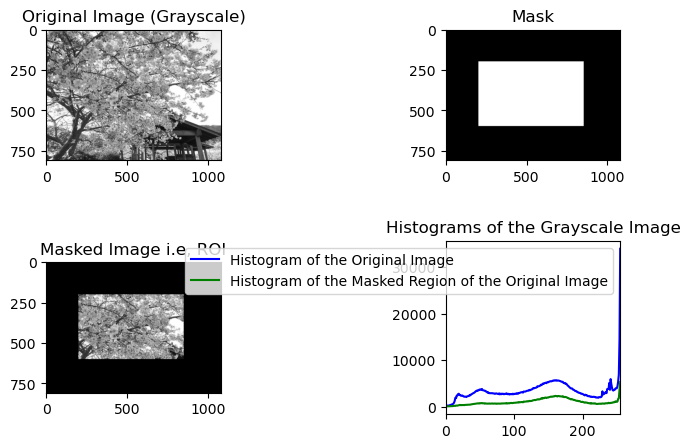

In [7]:
# finding and plotting histogram for the gray image in a specific region
orig_img = img_gray_cherry_blossom

mask = np.zeros(orig_img.shape[:2], dtype=np.uint8)
mask[200:600, 200:850] = 255

masked_image = cv.bitwise_and(orig_img, orig_img, mask=mask)

hist_orig = cv.calcHist([orig_img], [0], None, histSize=[256], ranges=[0, 256])
hist_masked_img = cv.calcHist(
    [orig_img], [0], mask=mask, histSize=[256], ranges=[0, 256]
)

plt.subplot(221), plt.imshow(orig_img, "gray"), plt.title("Original Image (Grayscale)")
plt.subplot(222), plt.imshow(mask, "gray"), plt.title("Mask")
plt.subplot(223), plt.imshow(masked_image, "gray"), plt.title("Masked Image i.e, ROI")

plt.subplot(224), plt.plot(
    hist_orig, color="b", label="Histogram of the Original Image"
), plt.legend(loc="upper right"), plt.plot(
    hist_masked_img,
    color="g",
    label="Histogram of the Masked Region of the Original Image",
), plt.legend(
    loc="upper right"
), plt.title(
    "Histograms of the Grayscale Image"
), plt.xlim(
    0, 255
)

plt.tight_layout()
plt.show()